In [70]:
import requests

try:
    print("Loading shared code from GitHub...")
    url = 'https://raw.githubusercontent.com/peterdresslar/Dresslar_CAS522/main/src/shared.py'
    response = requests.get(url)
    response.raise_for_status()
    exec(response.text)
    print("Successfully loaded shared code.")
except requests.exceptions.RequestException as e:
    print(f"Failed to load code from GitHub: {e}")
    print("\nPlease ensure you have an internet connection, or place the shared.py file in a 'src' directory next to this notebook.")

Loading shared code from GitHub...
Successfully loaded shared code.


## Dresslar CAS522 M5 Notebook


*Please note: this notebook will not run fully without its shared source code. If the loading function abve fails, the shared code can be downloaded from the specified location to a local folder accessible to the runtime of the notebook.*

### Markov Chain foundations

I continue to have difficulties working with the Pyvis library in VSCode. However, perhaps the good news is that by converting the code to work with the Python networkx library, I will gain a better understanding. Let's go ahead and reimplement the didactic material from the lesson notebook.

{('0', '0'): Text(0.450022141309678, -0.8194689599933015, '1'),
 ('0', '1'): Text(0.4219834124906304, -0.5886647792561369, '0.33'),
 ('1', '2'): Text(0.11594349238228074, 0.09734762365398053, '0.67'),
 ('2', '1'): Text(0.11594920812168097, 0.09734197627903374, '0.33'),
 ('2', '3'): Text(-0.4219835732854035, 0.5886643621685426, '0.67'),
 ('3', '3'): Text(-0.6819148418136395, 0.9858414400736843, '1')}

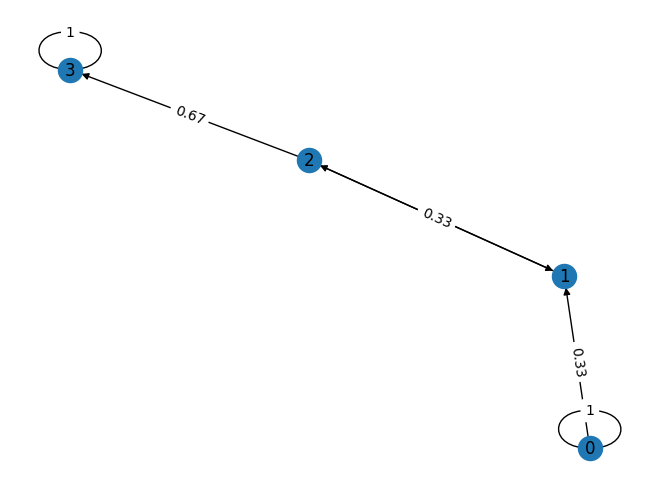

In [71]:
import networkx as nx
import numpy as np
from sympy import symbols, solve   

# draw a markov chain
# https://networkx.org/documentation/stable/reference/classes/digraph.html#networkx.DiGraph

G = nx.DiGraph()

# add nodes

G.add_node('0')
G.add_node('1')
G.add_node('2')
G.add_node('3')

G.add_edge('0', '0', weight=1)
G.add_edge('0', '1', weight=1/3)
G.add_edge('1', '2', weight=2/3)
G.add_edge('2', '1', weight=1/3)
G.add_edge('2', '3', weight=2/3)
G.add_edge('3', '3', weight=1)

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, pos=pos) 

# https://networkx.org/documentation/stable/reference/drawing.html
edge_labels = nx.get_edge_attributes(G, 'weight')
# we need to round those edge labels to 2 decimal places
edge_labels = {k: round(v, 2) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


Okay, this seems acceptable. The remainder of the example code from the notebook should stand unchanged:

{a1: 0.428571428571429*a0 + 0.571428571428571*a3, a2: 0.142857142857143*a0 + 0.857142857142857*a3}
<class 'dict'>
Probability of absorption to node 3 upon reaching node 1: 0.571428571428571
Probability of absorption to node 3 upon reaching node 2: 0.857142857142857


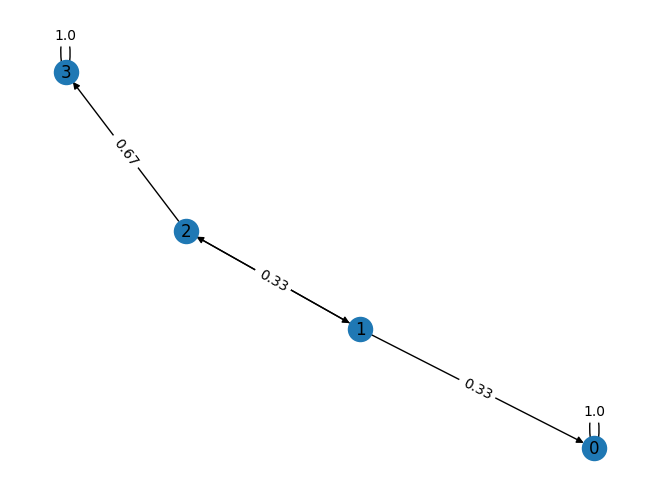

In [72]:
def absorbing_markov_chain(P):
    """
    note that P must be a 4x4 numpy array (matrix)
    """
    a = symbols('a:4')
    solution = solve(np.dot(P,a)-a, (a[1],a[2]))  # the MIDDLE two rows of the adjacency matrix
    print(solution)
    print(type(solution))
    # <class 'dict'>
    output1 = solution[a[1]].subs({a[0]:0,a[3]:1})
    output2 = solution[a[2]].subs({a[0]:0,a[3]:1})
    return output1, output2


P = np.array([
    [1,0,0,0],
    [1/3,0,2/3,0],
    [0,1/3,0,2/3],
    [0,0,0,1]
])
s1, s2 = absorbing_markov_chain(P)

# print(type(s1), type(s2))
# <class 'sympy.core.numbers.Float'> <class 'sympy.core.numbers.Float'>

# we can also use networkx to visualize the absorbing markov chain from the matrix
G = nx.from_numpy_array(P, create_using=nx.DiGraph)

# drwaing again
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, pos=pos) 
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: round(v, 2) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

print(f"Probability of absorption to node 3 upon reaching node 1: {s1.evalf()}")
print(f"Probability of absorption to node 3 upon reaching node 2: {s2.evalf()}")



The visualization along with the text should be fairly illustrative.